In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Load data from a CSV file (startup company dataset)
data_url = "https://open-data.s3.filebase.com/data1.csv"
df = pd.read_csv(data_url)

In [3]:
# Encode the 'Target' variable based on acquisition and closure status
# This creates a combined categorical feature representing possible outcomes
cat_names = {'TrueFalse': 1, 'TrueTrue': np.nan, 'FalseFalse': 2, 'FalseTrue': 3}
df["Target"] = df["is_acquired"].astype(str) + df["is_closed"].astype(str)
df["Target"] = df["Target"].replace(cat_names)

In [4]:
# Clean the data by removing rows with missing values
df.dropna(subset=["average_funded", "total_rounds", "Target"], inplace=True)

# Log-transform funding for better representation
df["average_funded"] = np.log(df["average_funded"] / 1000000)

In [5]:
# Prepare features (X) and target (y)
X = df[["average_funded", "total_rounds"]].values
y = df["Target"].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train a Decision Tree classifier to predict company outcomes
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

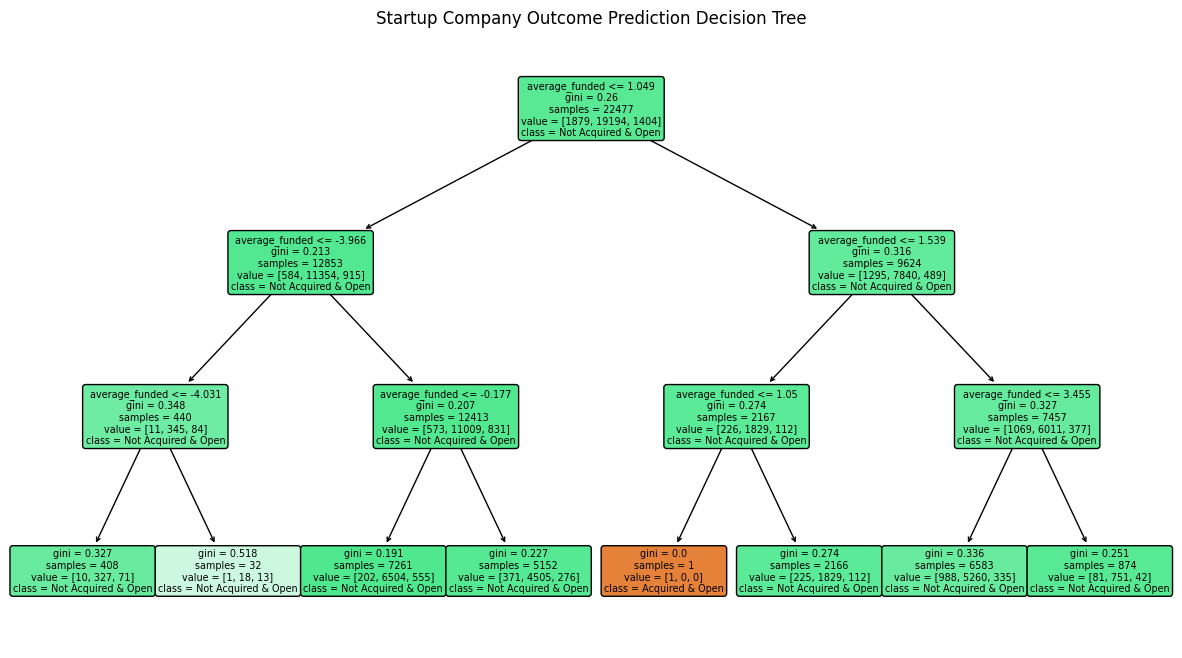

In [7]:
# Visualize the trained Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(
    tree_clf,
    feature_names=["average_funded", "total_rounds"],
    class_names=["Acquired & Open", "Not Acquired & Open", "Not Acquired & Close"],
    rounded=True,
    filled=True,
)
plt.title("Startup Company Outcome Prediction Decision Tree")
plt.show()

In [8]:
# Evaluate the model on the test set and report accuracy
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree model:", accuracy)

Accuracy of the Decision Tree model: 0.8526690391459075


In [9]:
# Visualize decision boundaries and model sensitivity
def plot_decision_boundary(clf, X, y, axes, class_labels, legend=True):
    # Generate points for decision boundary visualization
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Predict the outcome for each point in the mesh grid
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # Define colormap for visualization
    custom_cmap = ListedColormap(["#fafab0", "#a0faa0", "#9898ff"])

    # Create filled contour plot to represent decision boundaries
    plt.contourf(x1, x2, y_pred, alpha=0.9, cmap=custom_cmap)

    # Plot actual data points with different markers for each outcome class
    for label, marker in zip(class_labels, ["yo", "bs", "g^"]):
        plt.plot(X[y == label, 0], X[y == label, 1], marker, label=f"Class {label}")

    # Set plot labels and title
    plt.xlabel("Average Funded $M (Log)", fontsize=14)
    plt.ylabel("Total Rounds", fontsize=14)
    plt.title("Decision Boundary and Sensitivity")

    # Add legend if specified
    if legend:
        plt.legend(loc="lower right", fontsize=12)

In [10]:
# Visualize decision boundaries for the original and rotated data
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

Text(0.5, 1.0, 'Original Data Space')

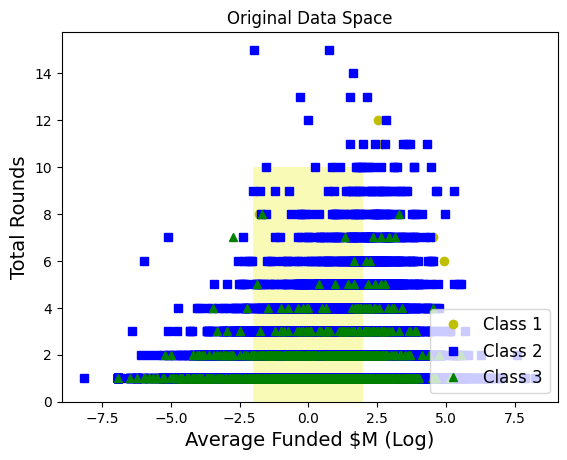

In [19]:
# Original data space
plt.subplot()
plot_decision_boundary(tree_clf, X_train, y_train, axes=[-2, 2, 0, 10], class_labels=[1, 2, 3])
plt.title("Original Data Space")

In [12]:
# Rotated data space
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X_train.dot(rotation_matrix)
tree_clf_r = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_r.fit(Xr, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

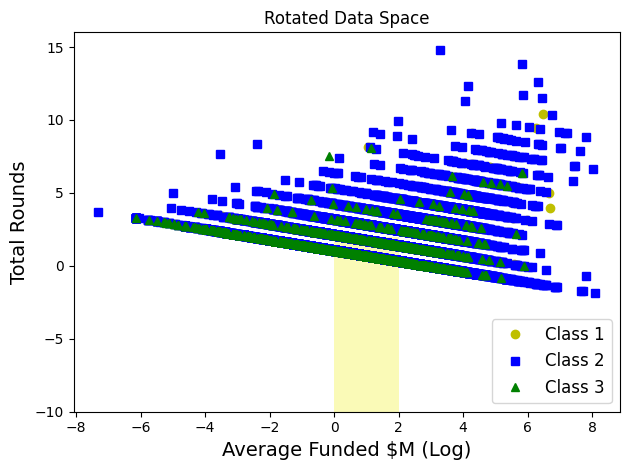

In [20]:
plt.subplot()
plot_decision_boundary(tree_clf_r, Xr, y_train, axes=[0, 2, -10, 2], class_labels=[1, 2, 3])
plt.title("Rotated Data Space")

plt.tight_layout()
plt.show()

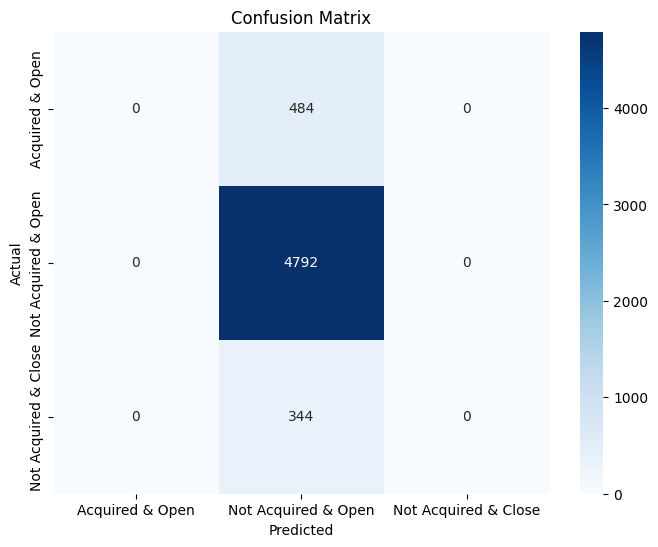

In [14]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Acquired & Open", "Not Acquired & Open", "Not Acquired & Close"], yticklabels=["Acquired & Open", "Not Acquired & Open", "Not Acquired & Close"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

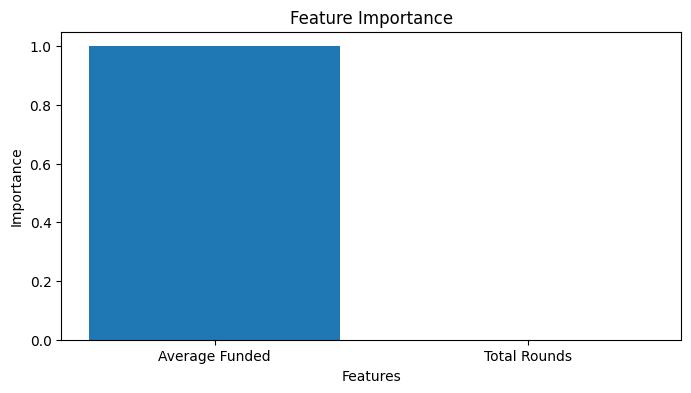

In [15]:
# Plot feature importance
feature_importances = tree_clf.feature_importances_
feature_names = ["Average Funded", "Total Rounds"]
plt.figure(figsize=(8, 4))
plt.bar(feature_names, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

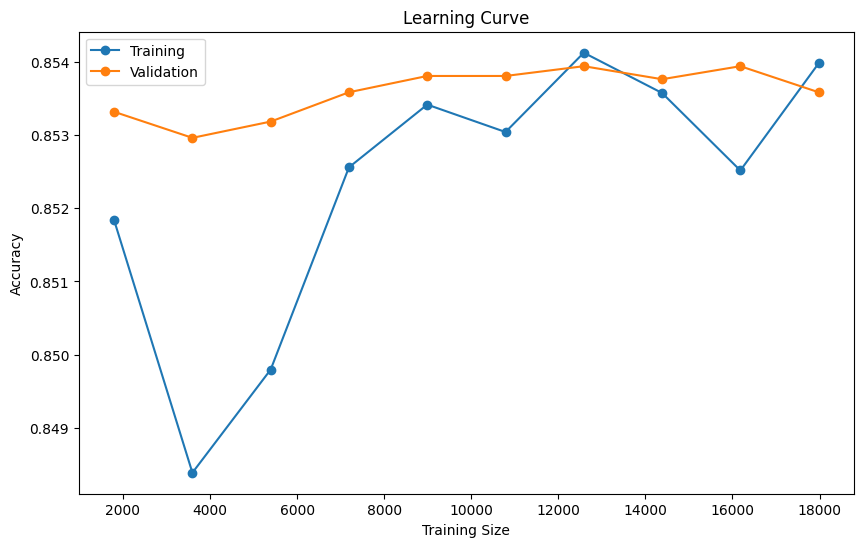

In [16]:
# Plot the learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(tree_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Validation")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

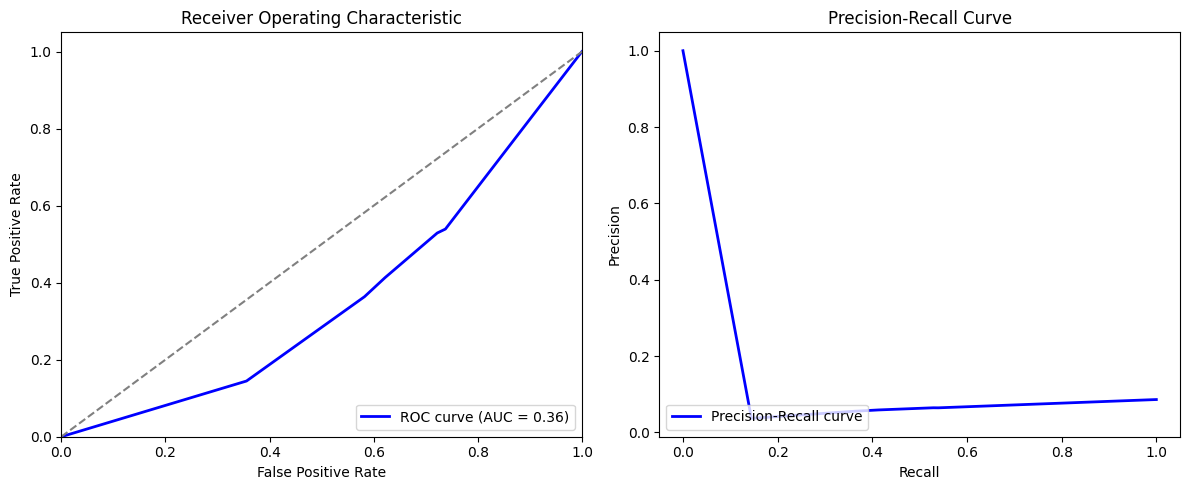


Interpreting the Decision Tree:
The decision tree captures patterns in startup companies' funding and total rounds to predict their outcomes.
The tree divides companies into different categories based on funding and total rounds, providing insights into potential acquisition and closure.

Model Evaluation:
The accuracy of the Decision Tree model on the test set is 85.27%.
This indicates how well the model generalizes to new, unseen data.


In [17]:
# Plot ROC curve and Precision-Recall curve
y_scores = tree_clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1], pos_label=1)
precision, recall, _ = precision_recall_curve(y_test, y_scores[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Provide insights based on the decision tree and model evaluation
print("\nInterpreting the Decision Tree:")
print("The decision tree captures patterns in startup companies' funding and total rounds to predict their outcomes.")
print("The tree divides companies into different categories based on funding and total rounds, providing insights into potential acquisition and closure.")

print("\nModel Evaluation:")
print(f"The accuracy of the Decision Tree model on the test set is {accuracy:.2%}.")
print("This indicates how well the model generalizes to new, unseen data.")